In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

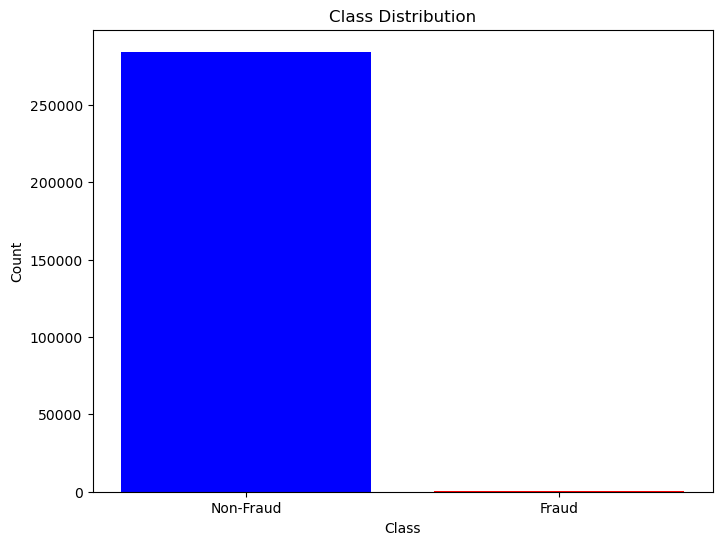

In [24]:
plt.figure(figsize=(8,6))
plt.bar(data['Class'].value_counts().index, data['Class'].value_counts().values, color=['blue','red'])
plt.xticks([0,1],['Non-Fraud','Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X = data.drop('Class', axis=1)
y = data.Class

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.svm import SVC

In [31]:
model_svc = SVC()

In [32]:
model_svc.fit(X_train, y_train)

SVC()

In [33]:
model_svc.score(X_train,y_train)

0.9996388515479224

In [34]:
model_svc.score(X_test,y_test)

0.9993679997191109

In [35]:
y_predict = model_svc.predict(X_test)

Implement Report

In [36]:
from sklearn.metrics import classification_report , confusion_matrix

In [37]:
import numpy as np

In [39]:
cm = confusion_matrix(y_test, y_predict, labels=[1,0])
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted Normal'])
confusion 

,predicted fraud,predicted Normal
is Fraud,89,47
is Normal,7,85300


In [40]:
import seaborn as sns

<Axes: >

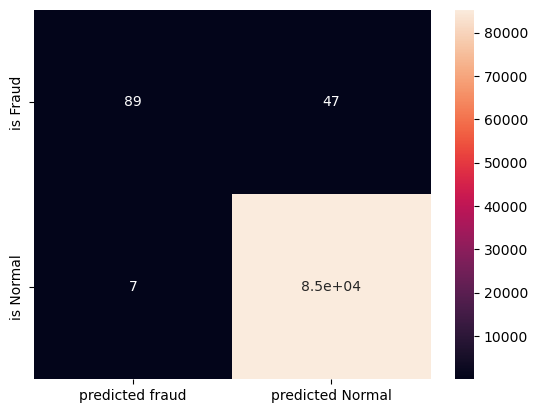

In [41]:
sns.heatmap(confusion, annot=True)

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.65      0.77       136

    accuracy                           1.00     85443
   macro avg       0.96      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [43]:
y_test_ex = np.array([1,0,1,0,1,0,0,1,1,0])
y_predict_ex = np.array([1,0,1,0,1,0,1,1,0,1])

In [45]:
confusion_ex = confusion_matrix(y_test_ex,y_predict_ex, labels=[1,0])
confusion_ex = pd.DataFrame(confusion_ex, index=['is Fraud', 'is Normal'], columns=['predicted Fraud', 'predicted Normal'])

In [48]:
print("\nExample confusion Matrix:")
print(confusion_ex)


Example confusion Matrix:
           predicted Fraud  predicted Normal
is Fraud                 4                 1
is Normal                2                 3
